In [1]:
import pandas as pd
print(pd.__name__, pd.__version__)

import numpy as np
print(np.__name__, np.__version__)

import matplotlib as plt
print(plt.__name__, plt.__version__)

import scipy.stats as stats
import scipy
print(scipy.__name__, scipy.__version__)

import seaborn as sns
print(sns.__name__, sns.__version__)

import matplotlib.pyplot as plt

import os

pandas 1.5.2
numpy 1.23.5
matplotlib 3.7.2
scipy 1.10.0
seaborn 0.12.2


In [2]:
##Import csv files with data. 

folder_path = './cyto_2024-04-03'

plate_plan = {
    'A01': 'WT', 'A02': 'WT-GFP', 'A03': 'G464S', 'A04': 'Q67F', 'A05': 'V130L', 'A06': 'K143L', 'A07': 'K147C', 'A08': 'S203V', 'A09': 'M292I', 'A10': 'S312R', 'A11': 'S314I', 'A12': 'N363M',
    'B01': 'WT', 'B02': 'WT-GFP', 'B03': 'G464S', 'B04': 'Q67F', 'B05': 'V130L', 'B06': 'K143L', 'B07': 'K147C', 'B08': 'S203V', 'B09': 'M292I', 'B10': 'S312R', 'B11': 'S314I', 'B12': 'N363M',
    'C01': 'WT', 'C02': 'WT-GFP', 'C03': 'G464S', 'C04': 'Q67F', 'C05': 'V130L', 'C06': 'K143L', 'C07': 'K147C', 'C08': 'S203V', 'C09': 'M292I', 'C10': 'S312R', 'C11': 'S314I', 'C12': 'N363M',
    'D01': 'WT', 'D02': 'WT-GFP', 'D03': 'G464S', 'D04': 'Q67F', 'D05': 'V130L', 'D06': 'K143L', 'D07': 'K147C', 'D08': 'S203V', 'D09': 'M292I', 'D10': 'S312R', 'D11': 'S314I', 'D12': 'N363M',
    'E01': 'I379K', 'E02': 'S458R', 'E03': 'G465Q', 'E04': 'R467S', 'E05': 'H468M', 'E06': 'L480K', 'E07': 'S506T', 'E08': '', 'E09': '', 'E10': '', 'E11': '', 'E12': '',
    'F01': 'I379K', 'F02': 'S458R', 'F03': 'G465Q', 'F04': 'R467S', 'F05': 'H468M', 'F06': 'L480K', 'F07': 'S506T', 'F08': '', 'F09': '', 'F10': '', 'F11': '', 'F12': '',
    'G01': 'I379K', 'G02': 'S458R', 'G03': 'G465Q', 'G04': 'R467S', 'G05': 'H468M', 'G06': 'L480K', 'G07': 'S506T', 'G08': '', 'G09': '', 'G10': '', 'G11': '', 'G12': '',
    'H01': 'I379K', 'H02': 'S458R', 'H03': 'G465Q', 'H04': 'R467S', 'H05': 'H468M', 'H06': 'L480K', 'H07': 'S506T', 'H08': '', 'H09': '', 'H10': '', 'H11': '', 'H12': ''
}

phenotype_plan = {
    'A01': 'Control', 'A02': 'Control', 'A03': 'Resistant', 'A04': 'Neutral', 'A05': 'Resistant', 'A06': 'Resistant', 'A07': 'Deleterious', 'A08': 'Deleterious', 'A09': 'Neutral', 'A10': 'Deleterious', 'A11': 'Resistant', 'A12': 'Neutral',
    'B01': 'Control', 'B02': 'Control', 'B03': 'Resistant', 'B04': 'Neutral', 'B05': 'Resistant', 'B06': 'Resistant', 'B07': 'Deleterious', 'B08': 'Deleterious', 'B09': 'Neutral', 'B10': 'Deleterious', 'B11': 'Resistant', 'B12': 'Neutral',
    'C01': 'Control', 'C02': 'Control', 'C03': 'Resistant', 'C04': 'Neutral', 'C05': 'Resistant', 'C06': 'Resistant', 'C07': 'Deleterious', 'C08': 'Deleterious', 'C09': 'Neutral', 'C10': 'Deleterious', 'C11': 'Resistant', 'C12': 'Neutral',
    'D01': 'Control', 'D02': 'Control', 'D03': 'Resistant', 'D04': 'Neutral', 'D05': 'Resistant', 'D06': 'Resistant', 'D07': 'Deleterious', 'D08': 'Deleterious', 'D09': 'Neutral', 'D10': 'Deleterious', 'D11': 'Resistant', 'D12': 'Neutral',
    'E01': 'Resistant', 'E02': 'Neutral', 'E03': 'Resistant', 'E04': 'Resistant', 'E05': 'Resistant', 'E06': 'Deleterious', 'E07': 'Neutral',
    'F01': 'Resistant', 'F02': 'Neutral', 'F03': 'Resistant', 'F04': 'Resistant', 'F05': 'Resistant', 'F06': 'Deleterious', 'F07': 'Neutral',
    'G01': 'Resistant', 'G02': 'Neutral', 'G03': 'Resistant', 'G04': 'Resistant', 'G05': 'Resistant', 'G06': 'Deleterious', 'G07': 'Neutral',
    'H01': 'Resistant', 'H02': 'Neutral', 'H03': 'Resistant', 'H04': 'Resistant', 'H05': 'Resistant', 'H06': 'Deleterious', 'H07': 'Neutral'
}

# empty df to store the data
all_data = pd.DataFrame()

# Iterate through each file in the directory
for filename in os.listdir(folder_path):
    print(filename)
    if filename.startswith('2024-04-03_at_03-09-37pm') and filename.endswith('.CSV'):
        file_path = os.path.join(folder_path, filename)
        print(file_path)
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Keep only the first 2000 rows aka 2000 cell events
        df = df.head(2000)
        # Filter the columns
        df_filtered = df[['GRN-B-HLin', 'GRN-B-HLog',"FSC-HLin","FSC-HLog","SSC-HLin","SSC-HLog"]]
        
        # Extract the XXX from the filename and create a new column
        file_parts = filename.split('.')
        xxx = file_parts[-2]
        df_filtered['Well'] = xxx
        
        # Concatenate the data to the main DataFrame
        all_data = pd.concat([all_data, df_filtered], ignore_index=True)
        
# Create a new column 'mutation' by mapping values from 'Well' column using the plate_plan dictionary
all_data['mutation'] = all_data['Well'].map(plate_plan)
# Create a new column 'phenotype' by mapping values from 'Well' column using the plate_plan dictionary
all_data['phenotype'] = all_data['Well'].map(phenotype_plan)

# Define the custom order for mutations
custom_order = ['WT', 'WT-GFP', 'G464S', 'Q67F', 'V130L', 'K143L', 'K147C', 'S203V', 'M292I', 'S312R', 'S314I', 'N363M', 'I379K', 'S458R', 'G465Q', 'R467S', 'H468M', 'L480K', 'S506T']

# Sort the DataFrame based on the custom order of mutations
all_data['mutation'] = pd.Categorical(all_data['mutation'], categories=custom_order, ordered=True)
all_data.sort_values(by='mutation', inplace=True)

# Save the concatenated data to a new CSV file
output_file = 'all_cyto_wells_2024-04-03.csv'
all_data.to_csv(output_file, index=False)
all_data

2024-04-03_at_03-09-37pm.A01.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.A01.CSV
2024-04-03_at_03-09-37pm.A02.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.A02.CSV
2024-04-03_at_03-09-37pm.A03.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.A03.CSV
2024-04-03_at_03-09-37pm.A04.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.A04.CSV
2024-04-03_at_03-09-37pm.A05.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.A05.CSV


C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

2024-04-03_at_03-09-37pm.A06.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.A06.CSV
2024-04-03_at_03-09-37pm.A07.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.A07.CSV
2024-04-03_at_03-09-37pm.A08.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.A08.CSV


C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

2024-04-03_at_03-09-37pm.A09.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.A09.CSV
2024-04-03_at_03-09-37pm.A10.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.A10.CSV


C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

2024-04-03_at_03-09-37pm.A11.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.A11.CSV
2024-04-03_at_03-09-37pm.A12.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.A12.CSV
2024-04-03_at_03-09-37pm.B01.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.B01.CSV


C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

2024-04-03_at_03-09-37pm.B02.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.B02.CSV
2024-04-03_at_03-09-37pm.B03.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.B03.CSV
2024-04-03_at_03-09-37pm.B04.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.B04.CSV


C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx


2024-04-03_at_03-09-37pm.B05.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.B05.CSV
2024-04-03_at_03-09-37pm.B06.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.B06.CSV


C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

2024-04-03_at_03-09-37pm.B07.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.B07.CSV
2024-04-03_at_03-09-37pm.B08.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.B08.CSV
2024-04-03_at_03-09-37pm.B09.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.B09.CSV
2024-04-03_at_03-09-37pm.B10.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.B10.CSV


C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

2024-04-03_at_03-09-37pm.B11.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.B11.CSV
2024-04-03_at_03-09-37pm.B12.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.B12.CSV
2024-04-03_at_03-09-37pm.C01.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.C01.CSV


C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx


2024-04-03_at_03-09-37pm.C02.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.C02.CSV
2024-04-03_at_03-09-37pm.C03.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.C03.CSV


C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx


2024-04-03_at_03-09-37pm.C04.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.C04.CSV
2024-04-03_at_03-09-37pm.C05.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.C05.CSV


C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

2024-04-03_at_03-09-37pm.C06.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.C06.CSV
2024-04-03_at_03-09-37pm.C07.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.C07.CSV
2024-04-03_at_03-09-37pm.C08.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.C08.CSV
2024-04-03_at_03-09-37pm.C09.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.C09.CSV


C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

2024-04-03_at_03-09-37pm.C10.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.C10.CSV
2024-04-03_at_03-09-37pm.C11.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.C11.CSV
2024-04-03_at_03-09-37pm.C12.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.C12.CSV
2024-04-03_at_03-09-37pm.D01.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.D01.CSV
2024-04-03_at_03-09-37pm.D02.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.D02.CSV


C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

2024-04-03_at_03-09-37pm.D03.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.D03.CSV
2024-04-03_at_03-09-37pm.D04.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.D04.CSV
2024-04-03_at_03-09-37pm.D05.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.D05.CSV
2024-04-03_at_03-09-37pm.D06.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.D06.CSV
2024-04-03_at_03-09-37pm.D07.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.D07.CSV
2024-04-03_at_03-09-37pm.D08.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.D08.CSV
2024-04-03_at_03-09-37pm.D09.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.D09.CSV


C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

2024-04-03_at_03-09-37pm.D10.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.D10.CSV
2024-04-03_at_03-09-37pm.D11.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.D11.CSV
2024-04-03_at_03-09-37pm.D12.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.D12.CSV
2024-04-03_at_03-09-37pm.E01.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.E01.CSV
2024-04-03_at_03-09-37pm.E02.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.E02.CSV
2024-04-03_at_03-09-37pm.E03.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.E03.CSV
2024-04-03_at_03-09-37pm.E04.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.E04.CSV


C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

2024-04-03_at_03-09-37pm.E05.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.E05.CSV
2024-04-03_at_03-09-37pm.E06.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.E06.CSV
2024-04-03_at_03-09-37pm.E07.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.E07.CSV


C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

2024-04-03_at_03-09-37pm.F01.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.F01.CSV
2024-04-03_at_03-09-37pm.F02.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.F02.CSV
2024-04-03_at_03-09-37pm.F03.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.F03.CSV


C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

2024-04-03_at_03-09-37pm.F04.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.F04.CSV
2024-04-03_at_03-09-37pm.F05.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.F05.CSV
2024-04-03_at_03-09-37pm.F06.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.F06.CSV
2024-04-03_at_03-09-37pm.F07.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.F07.CSV
2024-04-03_at_03-09-37pm.G01.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.G01.CSV
2024-04-03_at_03-09-37pm.G02.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.G02.CSV
2024-04-03_at_03-09-37pm.G03.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.G03.CSV


C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

2024-04-03_at_03-09-37pm.G04.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.G04.CSV
2024-04-03_at_03-09-37pm.G05.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.G05.CSV
2024-04-03_at_03-09-37pm.G06.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.G06.CSV
2024-04-03_at_03-09-37pm.G07.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.G07.CSV
2024-04-03_at_03-09-37pm.H01.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.H01.CSV
2024-04-03_at_03-09-37pm.H02.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.H02.CSV
2024-04-03_at_03-09-37pm.H03.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.H03.CSV


C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Well'] = xxx
C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\718646860.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

2024-04-03_at_03-09-37pm.H04.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.H04.CSV
2024-04-03_at_03-09-37pm.H05.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.H05.CSV
2024-04-03_at_03-09-37pm.H06.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.H06.CSV
2024-04-03_at_03-09-37pm.H07.CSV
./cyto_2024-04-03\2024-04-03_at_03-09-37pm.H07.CSV


,GRN-B-HLin,GRN-B-HLog,FSC-HLin,FSC-HLog,SSC-HLin,SSC-HLog,Well,mutation,phenotype
0,29.159834,1.464785,6537.578613,3.815417,6693.446289,3.825650,A01,WT,Control
49336,13.805899,1.140065,6546.749512,3.816026,4878.067871,3.688248,C01,WT,Control
49335,19.436806,1.288625,6048.460449,3.781645,5429.332031,3.734746,C01,WT,Control
49334,12.615575,1.100907,4488.862793,3.652136,3203.097900,3.505570,C01,WT,Control
49333,18.647367,1.270617,3649.660400,3.562253,3488.525635,3.542642,C01,WT,Control
...,...,...,...,...,...,...,...,...,...
122664,637.103516,2.804210,5938.553223,3.773681,5603.544922,3.748463,F07,S506T,Neutral
122663,6194.435547,3.792002,13364.800781,4.125962,19423.849609,4.288335,F07,S506T,Neutral
122662,265.651764,2.424313,7984.728027,3.902260,2737.749512,3.437394,F07,S506T,Neutral
122669,107.147583,2.029982,4402.620117,3.643711,3513.309814,3.545717,F07,S506T,Neutral


In [3]:
##Normalize the GFP signal with the FSC (proxy for cell size)

all_data["GFP_norm_lin"]= all_data["GRN-B-HLin"]/all_data["FSC-HLin"]
all_data

,GRN-B-HLin,GRN-B-HLog,FSC-HLin,FSC-HLog,SSC-HLin,SSC-HLog,Well,mutation,phenotype,GFP_norm_lin
0,29.159834,1.464785,6537.578613,3.815417,6693.446289,3.825650,A01,WT,Control,0.004460
49336,13.805899,1.140065,6546.749512,3.816026,4878.067871,3.688248,C01,WT,Control,0.002109
49335,19.436806,1.288625,6048.460449,3.781645,5429.332031,3.734746,C01,WT,Control,0.003214
49334,12.615575,1.100907,4488.862793,3.652136,3203.097900,3.505570,C01,WT,Control,0.002810
49333,18.647367,1.270617,3649.660400,3.562253,3488.525635,3.542642,C01,WT,Control,0.005109
...,...,...,...,...,...,...,...,...,...,...
122664,637.103516,2.804210,5938.553223,3.773681,5603.544922,3.748463,F07,S506T,Neutral,0.107283
122663,6194.435547,3.792002,13364.800781,4.125962,19423.849609,4.288335,F07,S506T,Neutral,0.463489
122662,265.651764,2.424313,7984.728027,3.902260,2737.749512,3.437394,F07,S506T,Neutral,0.033270
122669,107.147583,2.029982,4402.620117,3.643711,3513.309814,3.545717,F07,S506T,Neutral,0.024337


In [4]:
filtered = all_data[all_data['mutation'] == 'WT']

# Calculate median and standard deviation of GFP_norm 
GFP_median = filtered['GFP_norm_lin'].median(skipna=True)
GFP_std_dev = filtered['GFP_norm_lin'].std(skipna=True)

# Calculate the value of median + 2 standard deviations
GFP_med_wt = GFP_median + 2.5 * GFP_std_dev
 
print(str(GFP_med_wt))  

##Keeping only cells expressing GFP
GFP_df = all_data[all_data["GFP_norm_lin"]>GFP_med_wt]

#Get the log2
GFP_df["GFP_norm_log2"] = np.log2(GFP_df["GFP_norm_lin"]+1)

GFP_df

0.008122284482103946


C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\3069953901.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GFP_df["GFP_norm_log2"] = np.log2(GFP_df["GFP_norm_lin"]+1)


,GRN-B-HLin,GRN-B-HLog,FSC-HLin,FSC-HLog,SSC-HLin,SSC-HLog,Well,mutation,phenotype,GFP_norm_lin,GFP_norm_log2
49428,125.116531,2.097315,3738.749512,3.572726,2157.408203,3.333932,C01,WT,Control,0.033465,0.047489
49227,22.687065,1.355778,1476.780884,3.169316,4389.868652,3.642452,C01,WT,Control,0.015363,0.021995
49636,27.799906,1.444043,3288.896729,3.517050,2541.648193,3.405115,C01,WT,Control,0.008453,0.012143
49653,17.531055,1.243808,2015.951050,3.304480,1370.435059,3.136858,C01,WT,Control,0.008696,0.012492
49605,23.649193,1.373816,2613.860107,3.417282,6604.942871,3.819869,C01,WT,Control,0.009048,0.012994
...,...,...,...,...,...,...,...,...,...,...,...
122664,637.103516,2.804210,5938.553223,3.773681,5603.544922,3.748463,F07,S506T,Neutral,0.107283,0.147023
122663,6194.435547,3.792002,13364.800781,4.125962,19423.849609,4.288335,F07,S506T,Neutral,0.463489,0.549412
122662,265.651764,2.424313,7984.728027,3.902260,2737.749512,3.437394,F07,S506T,Neutral,0.033270,0.047217
122669,107.147583,2.029982,4402.620117,3.643711,3513.309814,3.545717,F07,S506T,Neutral,0.024337,0.034691


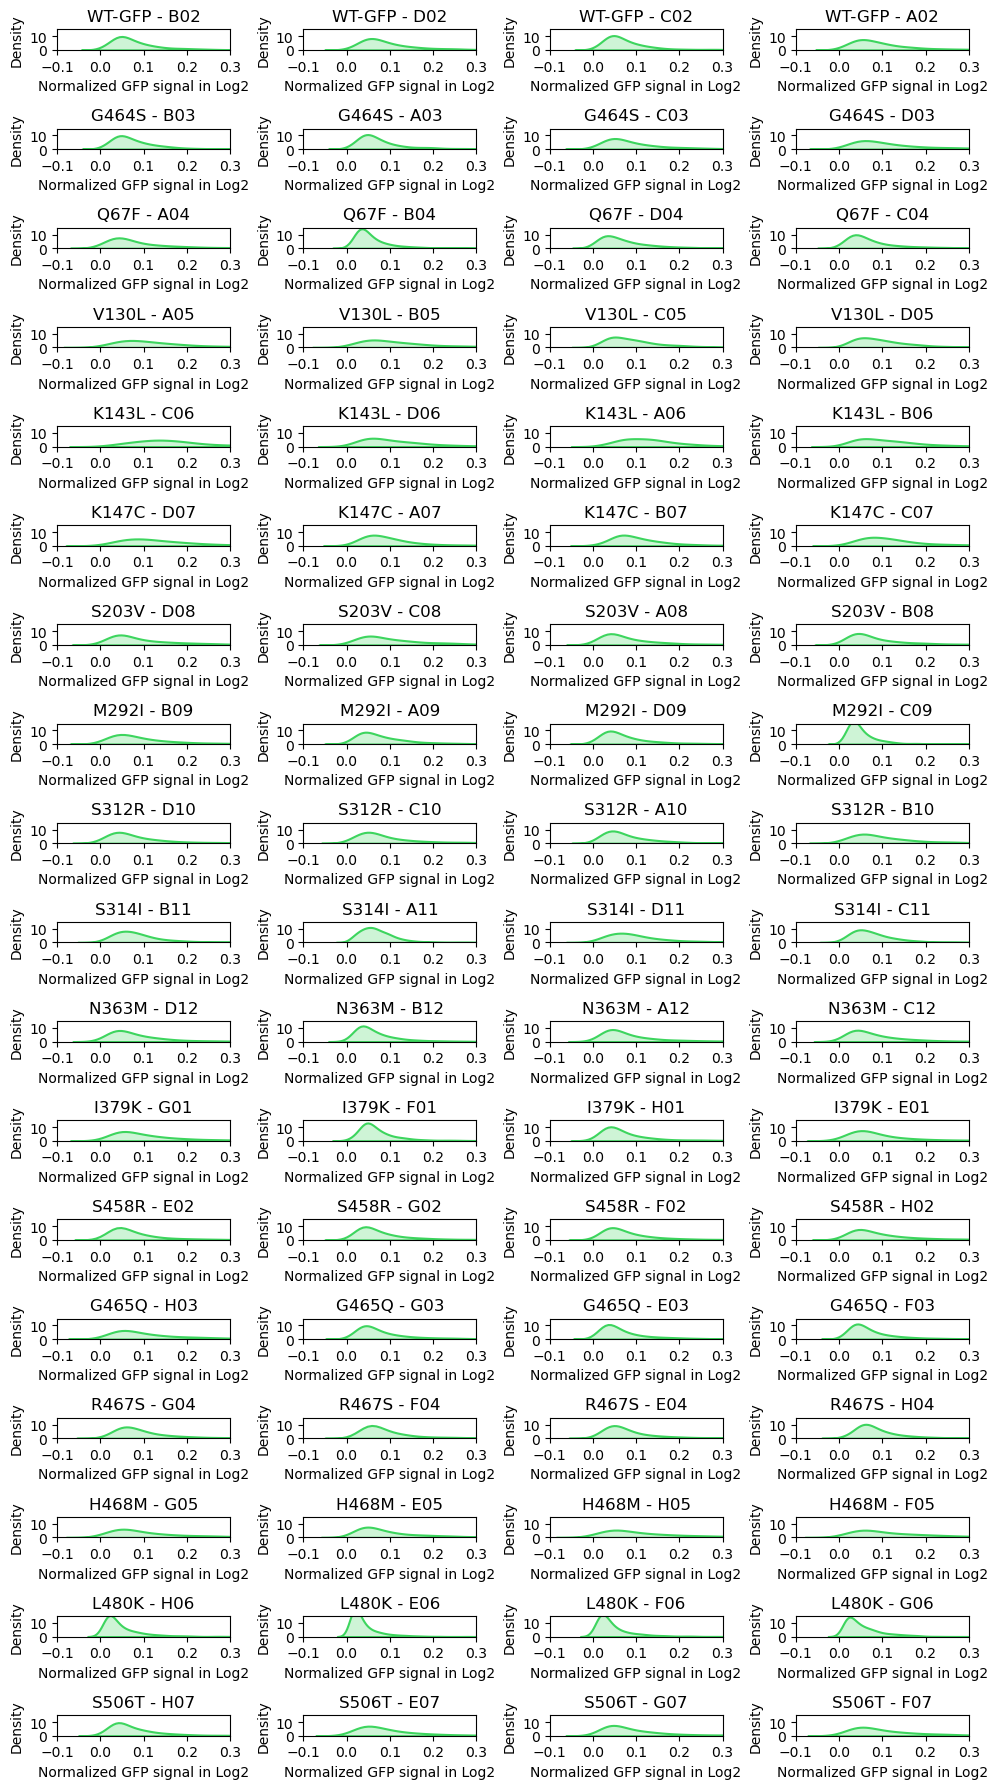

In [5]:
df_result = GFP_df.copy()
df_result = df_result[df_result["mutation"] != "WT"]


# Create a figure and axes for the plots
fig, axes = plt.subplots(nrows=18, ncols=4, figsize=(10, 18))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array for easier iteration
axes = axes.flatten()

wells = df_result['Well'].unique()
for i, well in enumerate(wells):
    ax = axes[i]
    # Filter the data for the specific well
    well_data = df_result[df_result['Well'] == well]
    # Get the mutation for the well
    mutation = well_data['mutation'].iloc[0]  # Assuming each well has the same mutation
    # Plot the density
    sns.kdeplot(data=well_data, x='GFP_norm_log2', ax=ax, fill=True, color="#3DD55E", linewidth=1.5)
    # Set the title with the well and mutation information
    ax.set_title(f'{mutation} - {well}')
    ax.set_xlabel('Normalized GFP signal in Log2')
    ax.set_ylabel('Density')
    ax.set_ylim(0,15)
    ax.set_xlim(-0.1, 0.3)

# Adjust layout and display the plots
plt.tight_layout()
plt.savefig("density_plot_all_wells_normGFPLog2_CB_2024-04-05.png", dpi = 300)

plt.show()

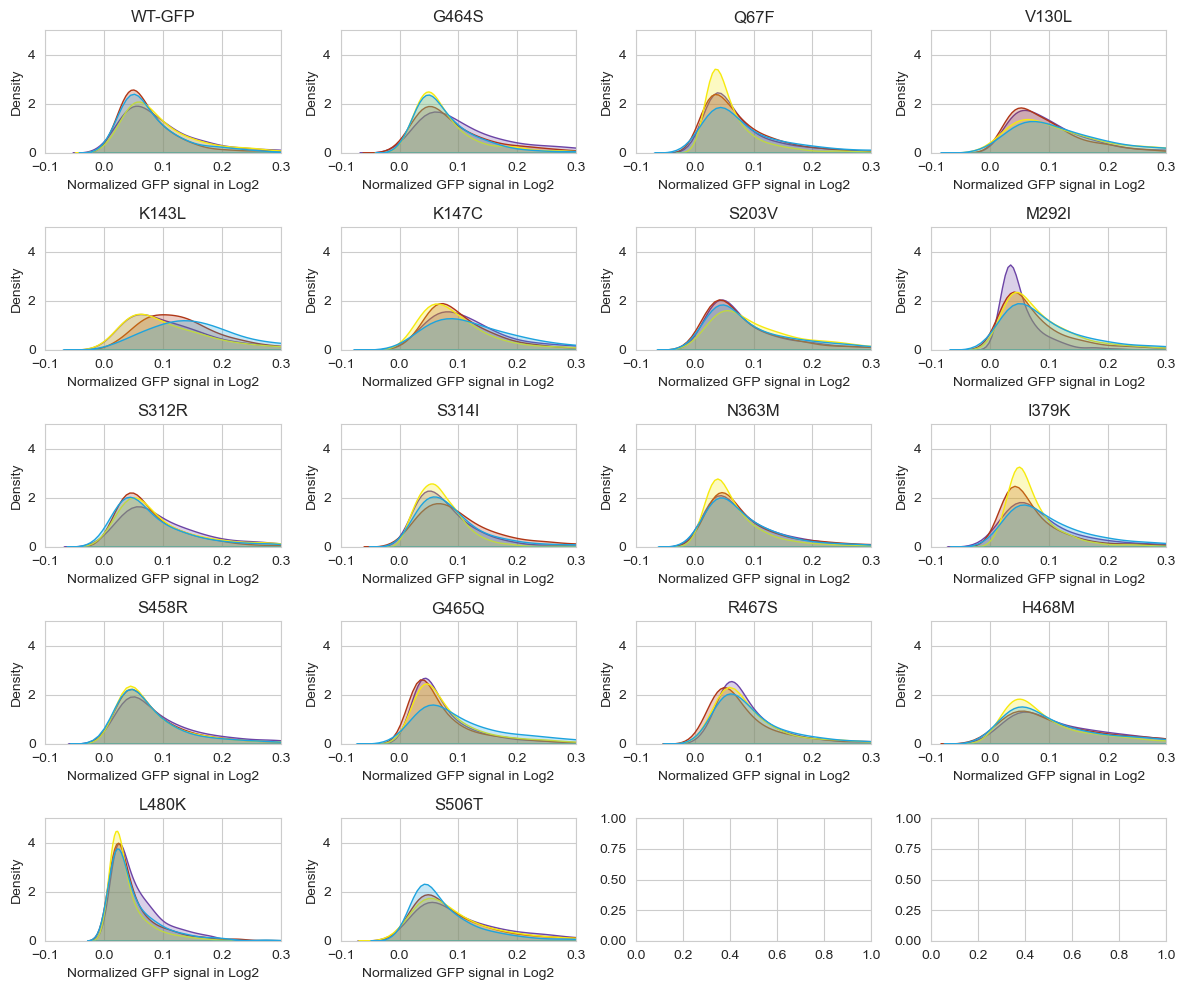

In [6]:
df_result = GFP_df.copy()
df_result = df_result[df_result["mutation"]!= "WT"]
# Set the style for the plots (optional)
sns.set_style("whitegrid")

# Create a figure and axes for the plots
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

# Flatten the axes array for easier iteration
axes = axes.flatten()
colors = ["#1DA3DE","#F6EA0E","#B03616","#6C44A6"]
muts = df_result['mutation'].unique()
for i, mut in enumerate(muts):
    ax = axes[i]
    # Filter the data for the specific well
    mut_data = df_result[df_result['mutation'] == mut]
    # Plot the density
    sns.kdeplot(data=mut_data, x='GFP_norm_log2',hue="Well", ax=ax, fill=True, palette = colors, linewidth=1, legend=False)
    # Set the title with the well and mutation information
    ax.set_title(f'{mut}')
    ax.set_xlabel('Normalized GFP signal in Log2')
    ax.set_ylabel('Density')
    ax.set_xlim(-0.1, 0.3)
    ax.set_ylim(0,5)


# Hide unused axes
for ax in axes[len(wells):]:
    ax.axis('off')

# Adjust layout and display the plots
plt.tight_layout()

plt.savefig("density_plot_all_mut_normGFPLog2_CB_2024-04-05.png", dpi = 300)
plt.show()

In [7]:
#get the median of the 2000 cell event for each sample (well)
df_result = GFP_df.copy()
df_result = df_result[df_result["mutation"]!= "WT"]

df_groupwell = df_result.groupby("Well")
df_well = df_groupwell.median()
df_well = df_well.reset_index()

df_well['mutation'] = df_well['Well'].map(plate_plan)

df_well['phenotype'] = df_well['Well'].map(phenotype_plan)
df_well

C:\Users\CABED117\AppData\Local\Temp\ipykernel_18900\144035611.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_well = df_groupwell.median()


,Well,GRN-B-HLin,GRN-B-HLog,FSC-HLin,FSC-HLog,SSC-HLin,SSC-HLog,GFP_norm_lin,GFP_norm_log2,mutation,phenotype
0,A02,310.840866,2.492538,5441.526856,3.735721,3972.074463,3.599017,0.055876,0.078440,WT-GFP,Control
1,A03,214.079315,2.330575,4843.689941,3.685176,3428.476074,3.535101,0.043068,0.060833,G464S,Resistant
2,A04,224.326569,2.350881,4924.145020,3.692331,3307.334473,3.519478,0.044214,0.062418,Q67F,Neutral
3,A05,402.659195,2.604938,5074.702149,3.705411,3458.178711,3.538848,0.080091,0.111153,V130L,Resistant
4,A06,451.419250,2.654580,5042.261230,3.702625,3385.386963,3.529608,0.089999,0.124326,K143L,Resistant
...,...,...,...,...,...,...,...,...,...,...,...
67,H03,319.185455,2.504043,4996.424805,3.698659,3384.489502,3.529493,0.062241,0.087111,G465Q,Resistant
68,H04,248.500000,2.395326,4558.139160,3.658787,2991.831055,3.475937,0.052900,0.074369,R467S,Resistant
69,H05,332.858765,2.522260,4708.193848,3.672854,3245.240234,3.511247,0.067305,0.093973,H468M,Resistant
70,H06,117.388680,2.069626,4866.661133,3.687231,3376.715576,3.528495,0.022974,0.032769,L480K,Deleterious


In [8]:
from scipy.stats import mannwhitneyu

df_result = df_well.copy()

significant = []

# Define the mutation groups excluding 'WT-GFP'
mutation_groups = df_result[df_result['mutation'] != 'WT-GFP']['mutation'].unique()

# Perform Mann-Whitney U test for each mutation group
for mutation in mutation_groups:
    wt_gfp_data = df_result[df_result['mutation'] == 'WT-GFP']['GFP_norm_log2']
    other_mutation_data = df_result[df_result['mutation'] == mutation]['GFP_norm_log2']
    
    # Perform Mann-Whitney U test
    statistic, p_value = mannwhitneyu(wt_gfp_data, other_mutation_data, alternative='two-sided')
    
    # Print the test results for each mutation group
    print(f"Mutation: {mutation}")
    print(f"Mann-Whitney U Statistic: {statistic}")
    print(f"P-value: {p_value}")
    
    # Check if the p-value is significant (e.g., less than 0.05)
    if p_value < 0.05:
        print("The Mann-Whitney U test indicates a significant difference.")
        significant.append(mutation)
    else:
        print("No significant difference found.")
    
    print()  # Add a line break for readability

Mutation: G464S
Mann-Whitney U Statistic: 8.0
P-value: 1.0
No significant difference found.

Mutation: Q67F
Mann-Whitney U Statistic: 15.0
P-value: 0.05714285714285714
No significant difference found.

Mutation: V130L
Mann-Whitney U Statistic: 0.0
P-value: 0.02857142857142857
The Mann-Whitney U test indicates a significant difference.

Mutation: K143L
Mann-Whitney U Statistic: 0.0
P-value: 0.02857142857142857
The Mann-Whitney U test indicates a significant difference.

Mutation: K147C
Mann-Whitney U Statistic: 0.0
P-value: 0.02857142857142857
The Mann-Whitney U test indicates a significant difference.

Mutation: S203V
Mann-Whitney U Statistic: 7.0
P-value: 0.8857142857142857
No significant difference found.

Mutation: M292I
Mann-Whitney U Statistic: 12.0
P-value: 0.34285714285714286
No significant difference found.

Mutation: S312R
Mann-Whitney U Statistic: 8.0
P-value: 1.0
No significant difference found.

Mutation: S314I
Mann-Whitney U Statistic: 6.0
P-value: 0.6857142857142857
No si

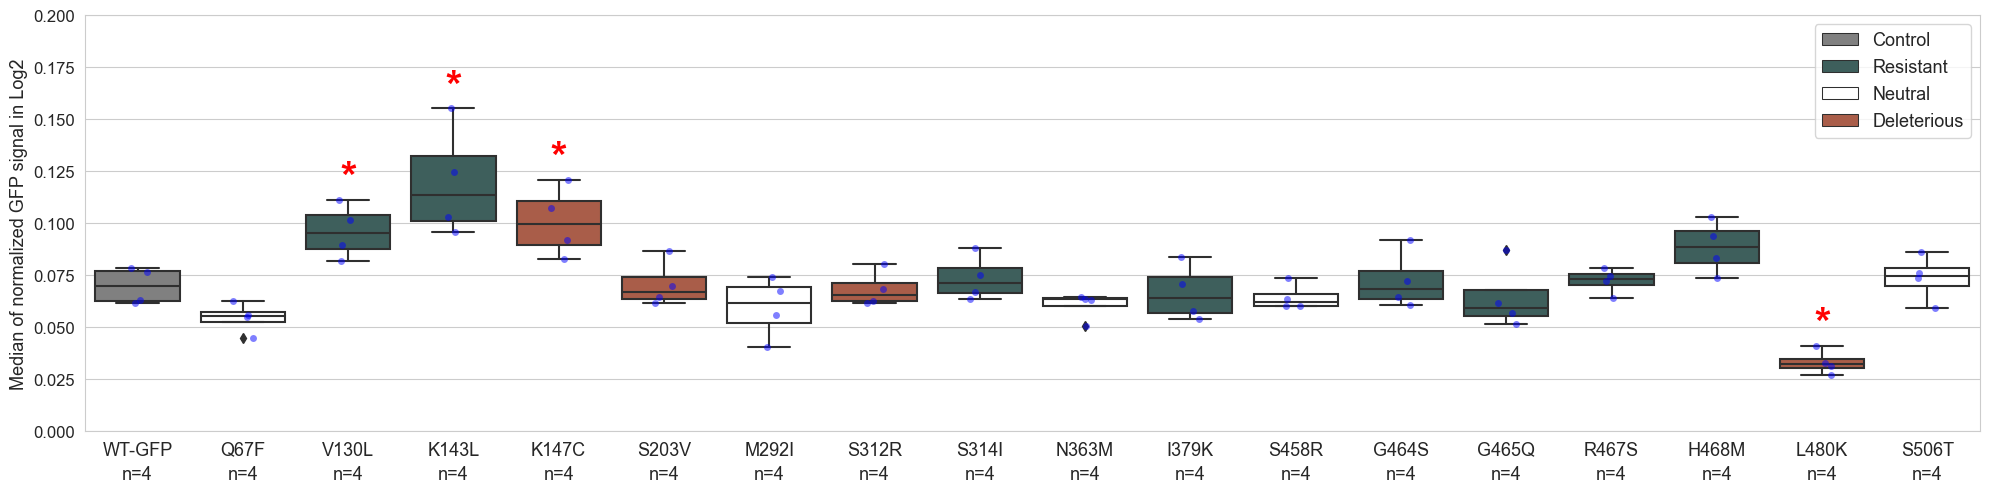

In [9]:
df_result = df_well.copy()

# Define the custom order for the violin plot and point counts
custom_order = ['WT-GFP', 'Q67F',  'V130L', 'K143L', 'K147C', 'S203V',
                'M292I', 'S312R', 'S314I', 'N363M', 'I379K', 'S458R', 'G464S','G465Q',
                'R467S', 'H468M', 'L480K', 'S506T']

custom_palette = ["grey","#386461","#FFFFFF","#B95439"]

sns.set_style("whitegrid")


# Create the violin plot with transparent points and point counts
fig, ax = plt.subplots(figsize=(20, 5))
# Add points using stripplot with transparency (alpha)
sns.stripplot(x='mutation', y='GFP_norm_log2', data=df_result, color='blue', size=5, jitter=True, alpha=0.5, ax=ax, order=custom_order)

# Create the violin plot with custom order
sns.boxplot(x='mutation', y='GFP_norm_log2', data=df_result, palette = custom_palette,dodge=False, hue="phenotype", ax=ax, order=custom_order)

# Calculate and annotate point counts in the custom order
data_counts = df_result['mutation'].value_counts()[custom_order]
for i, count in enumerate(data_counts):
    ax.text(i, -0.025, f'n={count}', ha='center', va='bottom', fontsize=13)

# Add '*' to significant mutants
for i, mutation in enumerate(custom_order):
    if mutation in significant:
        maxi = df_result[df_result['mutation']==mutation]['GFP_norm_log2'].max()
        ax.text(i, maxi+0.01, '*', ha='center', va='center', fontsize=30, color="red",fontweight='bold')

ax.set_xlabel('')
ax.set_ylabel('Median of normalized GFP signal in Log2', fontsize=13)

plt.legend( title='', fontsize=13, title_fontsize='large')

plt.xticks(size=13)                                      
plt.yticks(size=12)
plt.ylim(0,0.2)

plt.tight_layout()
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig("violon_plot_medians_normGFPLog2_CB_2024-04-05.png", dpi=300)
plt.savefig("violon_plot_medians_normGFPLog2_CB_2024-04-05.svg", dpi=300)
plt.show()